## Inspecting the dataset:

In [1]:
import pandas as pd

data = pd.read_csv('all_signals.csv')
#data.iloc[1000:1200,:]
data

,actual,predict1,predict2,predict3,predict4,predict5,predict6
0,0.0,20.792572,2.264052,2.264052,2.264052,2.264052,9.764052
1,0.0,19.428677,0.900157,0.900157,0.900157,0.900157,8.400157
2,0.0,20.007258,2.940019,2.940019,1.478738,1.478738,8.978738
3,0.0,21.269413,4.202174,4.202174,2.740893,2.740893,10.240893
4,0.0,20.896078,3.828839,3.828839,2.367558,2.367558,9.867558
...,...,...,...,...,...,...,...
30482,0.0,18.439183,NaN,NaN,NaN,NaN,NaN
30483,0.0,20.028197,NaN,NaN,NaN,NaN,NaN
30484,0.0,17.293372,NaN,NaN,NaN,NaN,NaN
30485,0.0,19.587188,NaN,NaN,NaN,NaN,NaN


In [2]:
data = data.fillna(0)
data.isna().any()

actual      False
predict1    False
predict2    False
predict3    False
predict4    False
predict5    False
predict6    False
dtype: bool

In [3]:
data = data[data.actual > 0]
data.reset_index(inplace=True, drop=True)
data.head()

,actual,predict1,predict2,predict3,predict4,predict5,predict6
0,1.461281,13.367114,21.399214,21.399214,0.642885,0.642885,-1.318396
1,1.461281,14.314806,22.346906,22.346906,1.590577,1.590577,-0.370704
2,1.461281,13.739894,21.771994,21.771994,1.015665,1.015665,-0.945616
3,1.461281,13.752769,21.784869,21.784869,1.028540,1.028540,-0.932741
4,1.461281,13.422442,21.454542,21.454542,0.698213,0.698213,-1.263068


In [4]:
len(data)

26920

### Visualizing before SYNCHRONIZATION

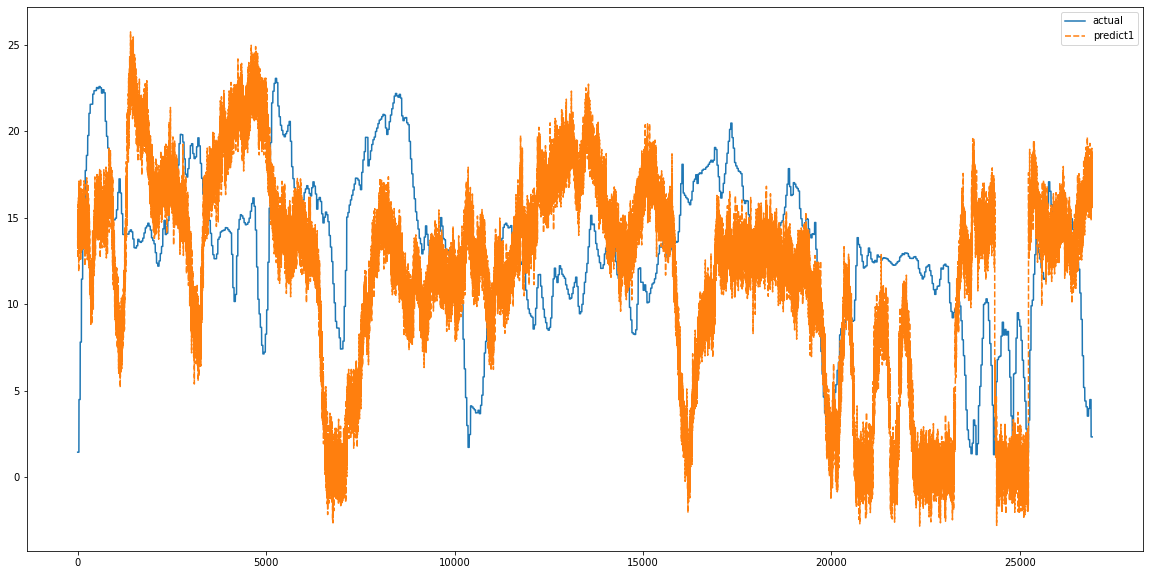

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

actual_speed = data[["actual", "predict1"]]
plt.figure(figsize=(20,10))
sns.lineplot(data=actual_speed)
#plt.axis([0,500,0,25])
plt.show()

## Building the Synchronization function:

In [6]:
from fastdtw import *
from scipy.spatial.distance import *

def synchronizise(column1, column2):
    data[column1] = data[column1].fillna(data[column1].mean())
    data[column2] = data[column2].fillna(data[column2].mean())
    x = data[column1]
    y = data[column2]
    
    # using the dynamic time warping model:
    distance, path = fastdtw(x, y, dist=euclidean)
    result = []
    for i in range(0,len(path)):
        result.append([data[column1].iloc[path[i][0]], data[column2].iloc[path[i][1]]])
        
    data_sync = pd.DataFrame(data=result,columns=[column1, column2])
    return data_sync

In [13]:
data_sync_1 = synchronizise('actual', 'predict1')
data_sync_2 = synchronizise('actual', 'predict2')
data_sync_3 = synchronizise('actual', 'predict3')
data_sync_4 = synchronizise('actual', 'predict4')
data_sync_5 = synchronizise('actual', 'predict5')
data_sync_6 = synchronizise('actual', 'predict6')

In [14]:
len(data_sync_1)

39331

In [24]:
synced_data = data_sync_1

In [26]:
synced_data['predict2'] = data_sync_2.predict2
synced_data['predict3'] = data_sync_3.predict3
synced_data['predict4'] = data_sync_4.predict4
synced_data['predict5'] = data_sync_5.predict5
synced_data['predict6'] = data_sync_6.predict6

In [27]:
synced_data.head()

,actual,predict1,predict2,predict3,predict4,predict5,predict6
0,1.461281,13.367114,21.399214,21.399214,0.642885,0.642885,-1.318396
1,1.461281,14.314806,22.346906,22.346906,1.590577,1.590577,-0.370704
2,1.461281,13.739894,21.771994,21.771994,1.015665,1.015665,-0.945616
3,1.461281,13.752769,21.784869,21.784869,1.028540,1.028540,-0.932741
4,1.461281,13.422442,21.454542,21.454542,0.698213,0.698213,-1.263068


In [28]:
synced_data.to_csv('synchronized_data.csv')

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

def visualize(df, predict):
    actual_speed = df[[predict, "actual"]]
    #palette = sns.color_palette("mako_r", 6)
    plt.figure(figsize=(20,10))
    sns.lineplot(data=actual_speed)
    plt.show()

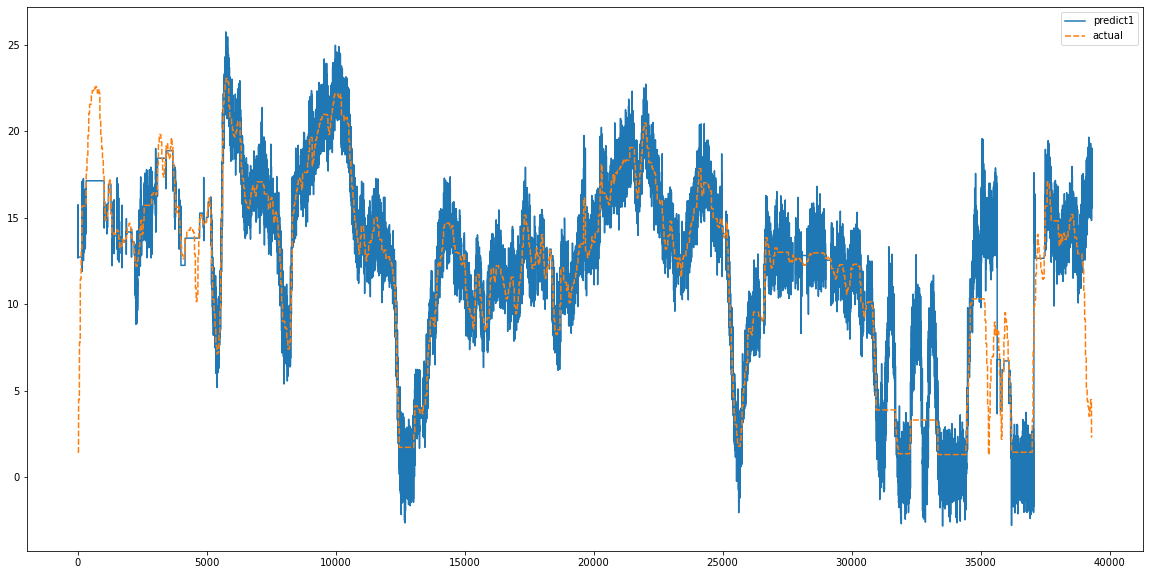

In [16]:
visualize(data_sync_1, 'predict1')

In [18]:
from sklearn.metrics import r2_score
list1 = ['predict1', 'predict2', 'predict3', 'predict4', 'predict5', 'predict6']
score_list = []
for i in list1: 
    score = r2_score(data['actual'], data[i])
    score_list.append(score)
    
list2 = [data_sync_1, data_sync_2, data_sync_3, data_sync_4, data_sync_5, data_sync_6]
score_list2 = []
for i in range(len(list1)):
    score = r2_score(list2[i]['actual'], list2[i][list1[i]])
    score_list2.append(score)

In [19]:
score_df = pd.DataFrame([score_list, score_list2], columns=list1, index=["Before_Sync", "After_Sync"])
score_df

,predict1,predict2,predict3,predict4,predict5,predict6
Before_Sync,-1.472817,-0.500093,-0.398998,0.936544,0.453260,-2.108229
After_Sync,0.850661,0.914755,0.900203,0.957403,0.939091,0.938969


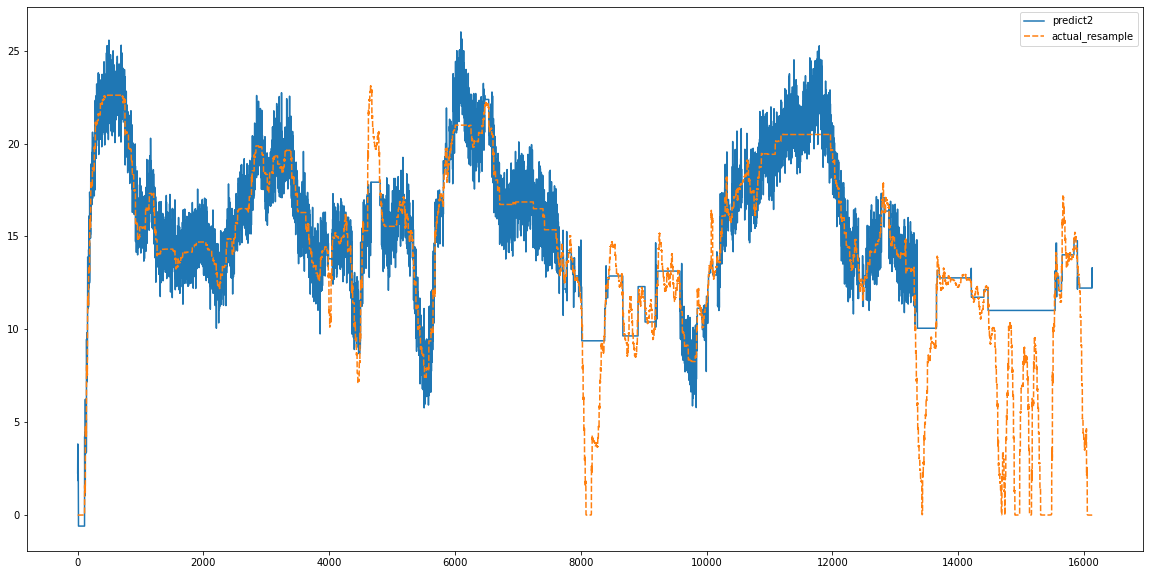

In [45]:
visualize(data_sync_2, 'predict2')